In [152]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as pllt



In [153]:
bike_df = pd.read_csv(r'C:\Users\Asus\Downloads/daily-bike-share.csv')
bike_df['day'] = pd.DatetimeIndex(bike_df['dteday']).day
bike_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,27
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,28
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,29
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,30


In [154]:
numeric_features = ['temp','atemp','hum','windspeed']
bike_df[numeric_features +['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


In [155]:
bike_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,27
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,28
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,29
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,30


Text(0.5, 0.98, 'Rental Distribution')

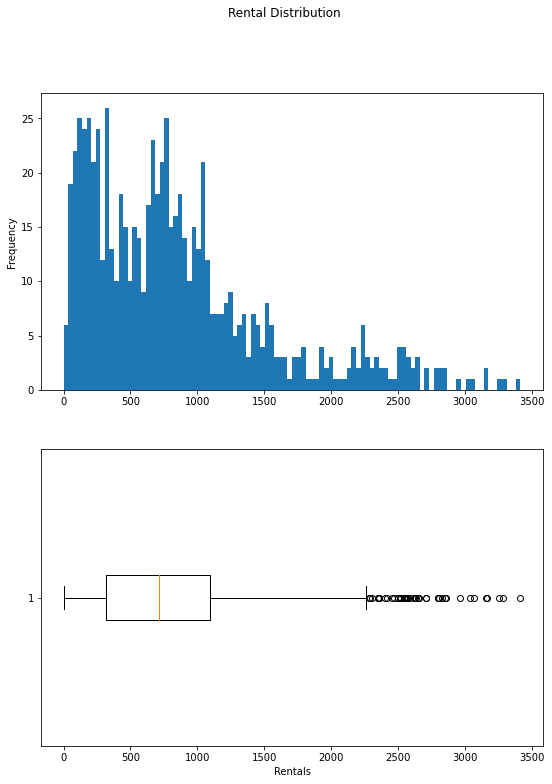

In [156]:
label = bike_df['rentals']
fig, ax = pllt.subplots(2,1, figsize=(9,12))
#Plot the histogram for rentals
ax[0].hist(label, bins = 100)
ax[0].set_ylabel('Frequency')
#Plot the boxplot for rentals
ax[1].boxplot(label,vert = False)
ax[1].set_xlabel('Rentals')

fig.suptitle('Rental Distribution')

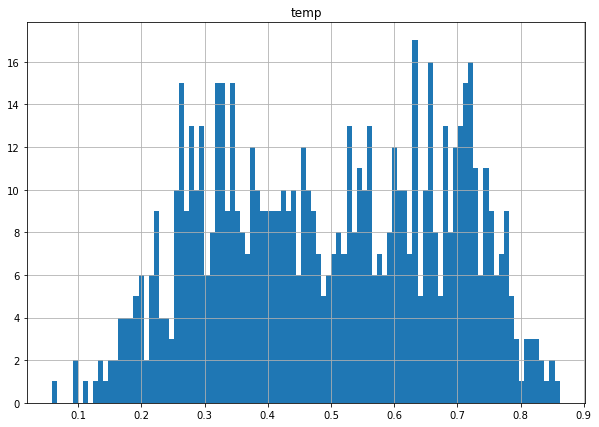

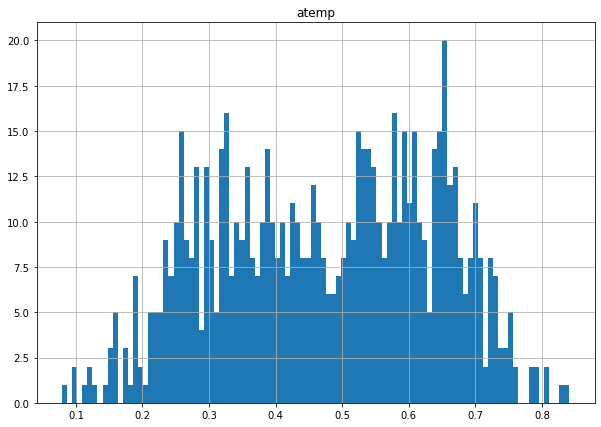

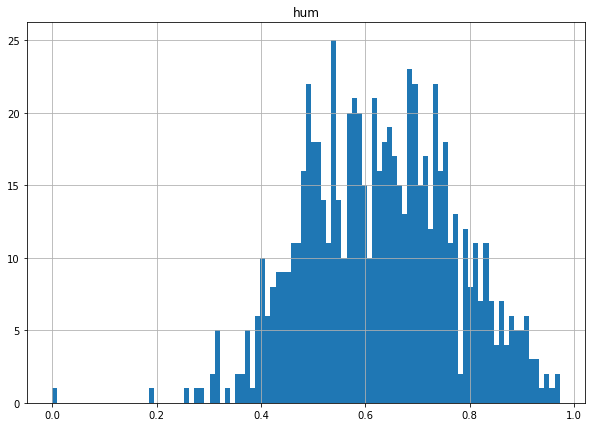

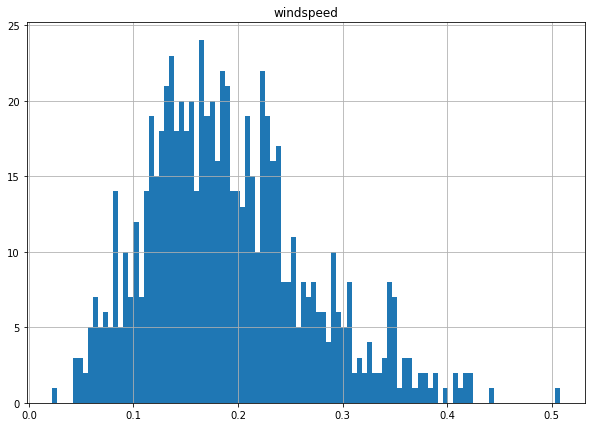

In [157]:
#Plot histogram for each numeric feature
for col in numeric_features:
    fig = pllt.figure(figsize=(10,7))
    feature = bike_df[col]
    pllt.hist(feature,bins=100)
    pllt.title(col)
    pllt.grid()
    pllt.show()
    

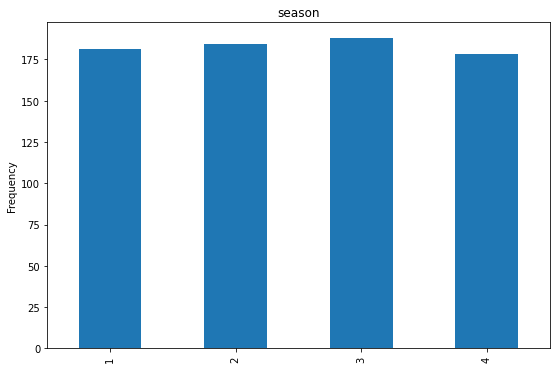

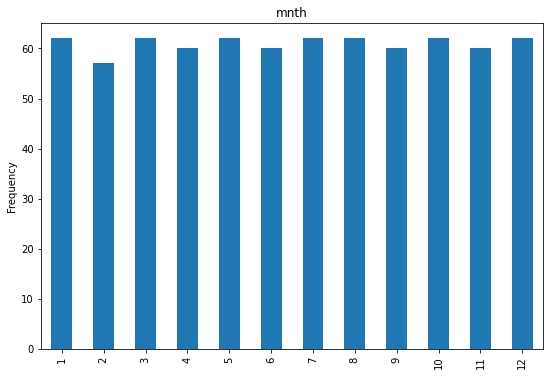

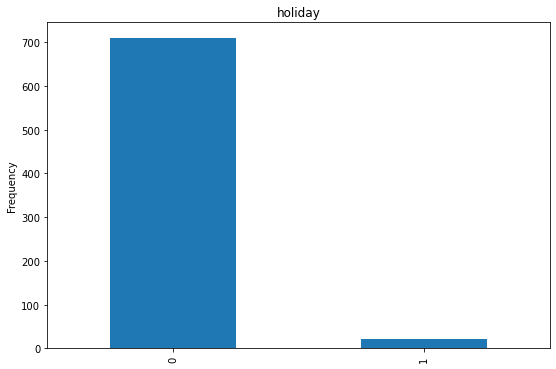

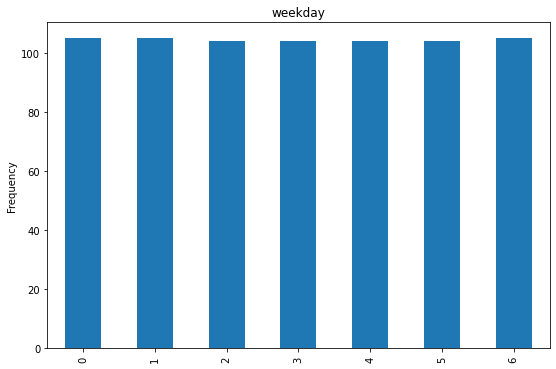

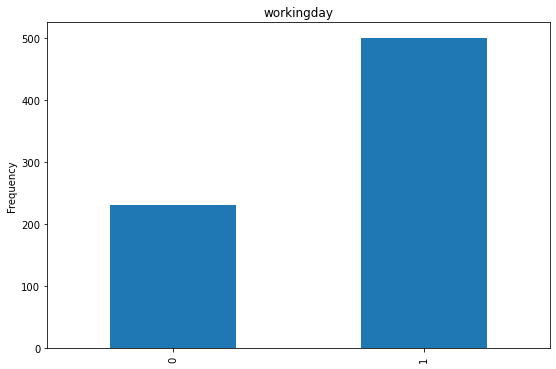

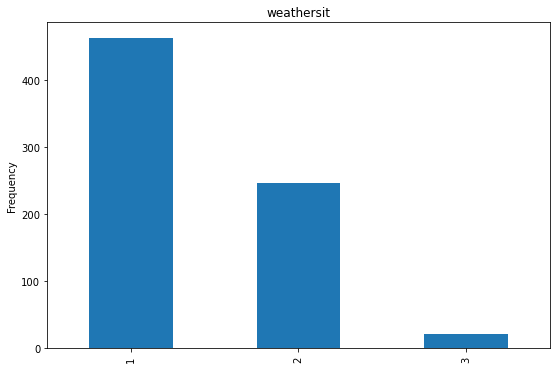

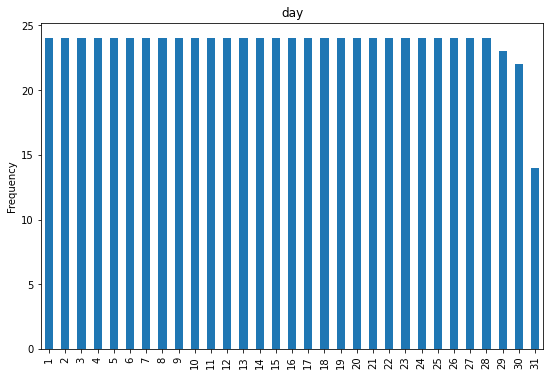

In [158]:
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit','day']
#Plot chart for categorical features
for col in categorical_features:
    counts = bike_df[col].value_counts().sort_index()
    fig = pllt.figure(figsize=(9,6))
    counts.plot.bar()
    pllt.title(col)
    pllt.ylabel('Frequency')
    

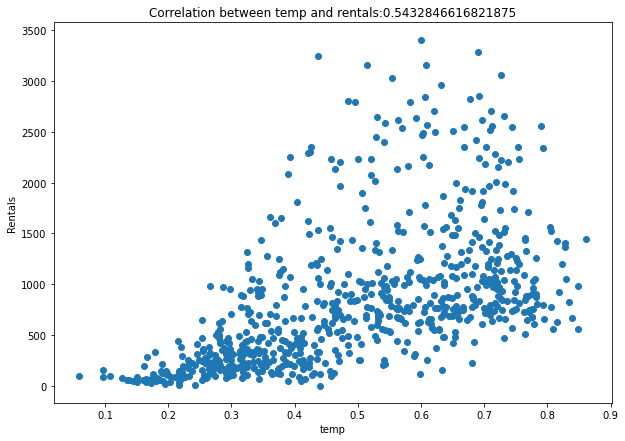

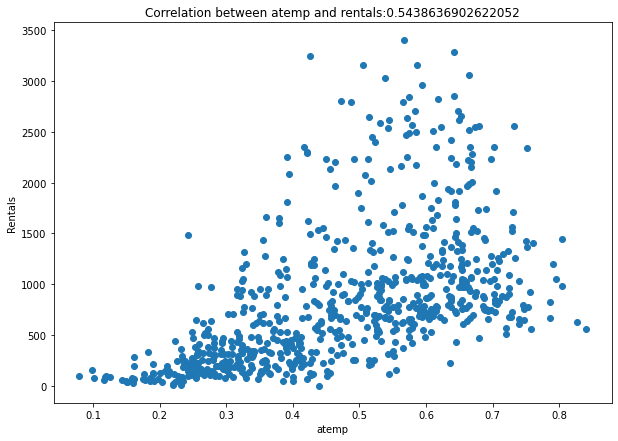

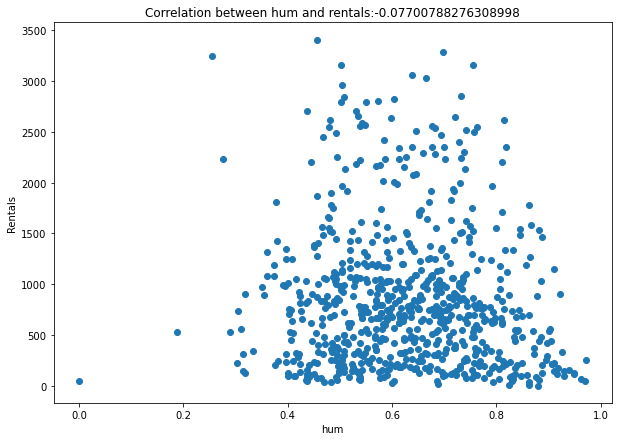

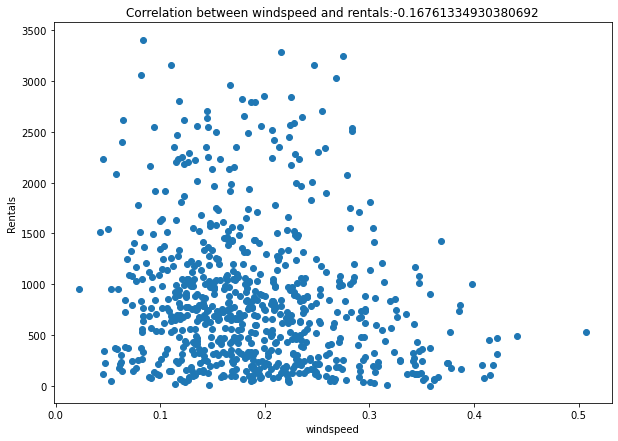

In [159]:
#Show correlation between numeric features and label
for col in numeric_features:
    fig = pllt.figure(figsize=(10,7))
    feature = bike_df[col]
    label = bike_df['rentals']
    correlation = feature.corr(label)
    pllt.scatter(x= feature,y = label)
    pllt.xlabel(col)
    pllt.ylabel('Rentals')
    pllt.title('Correlation between '+ col + ' and' + ' rentals:' + str(correlation))
    

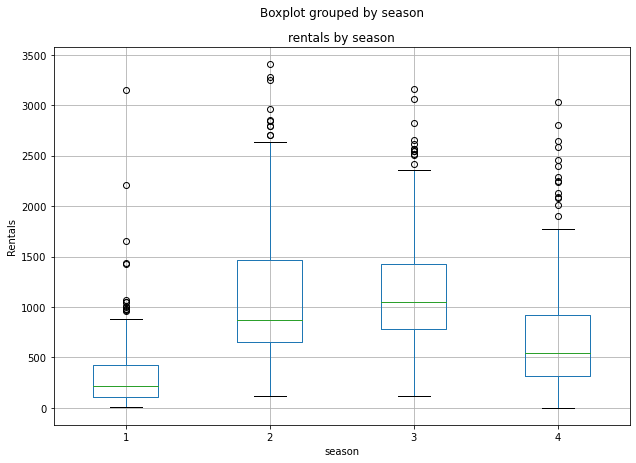

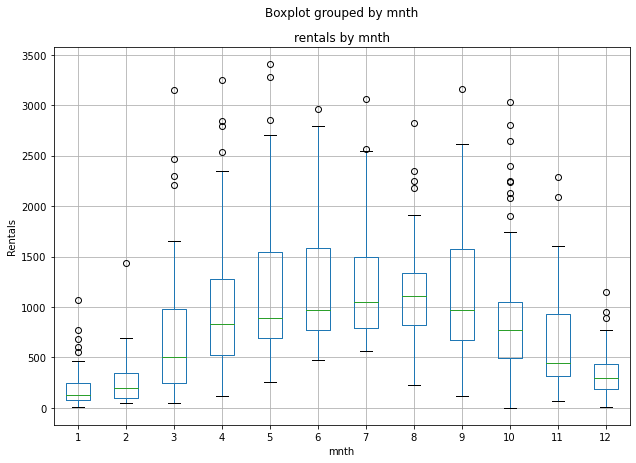

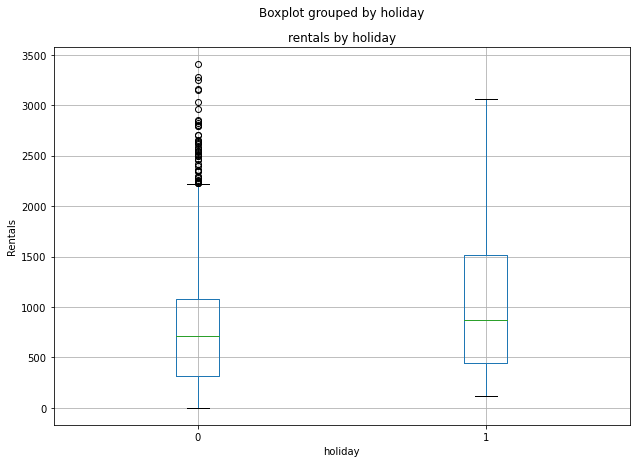

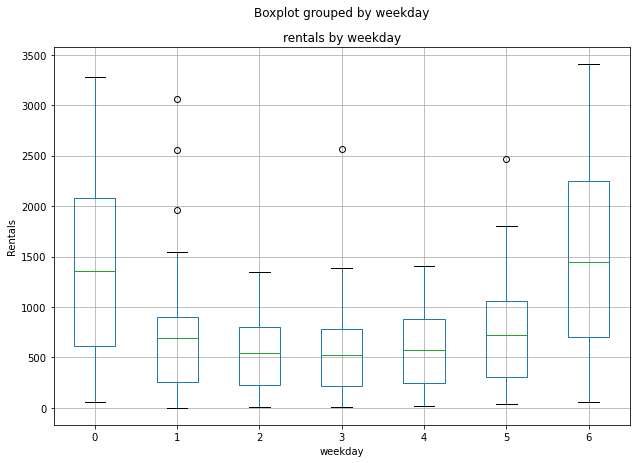

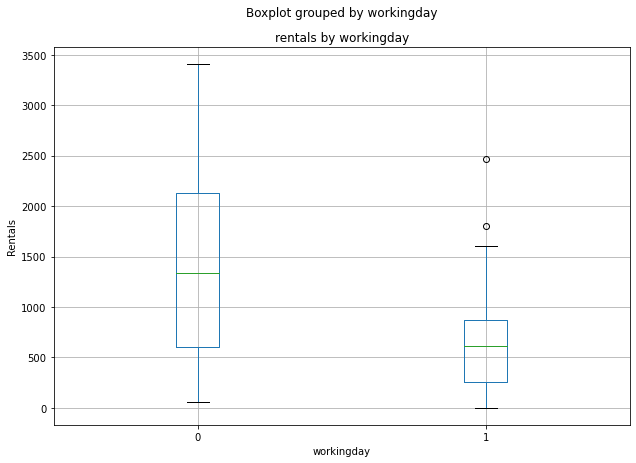

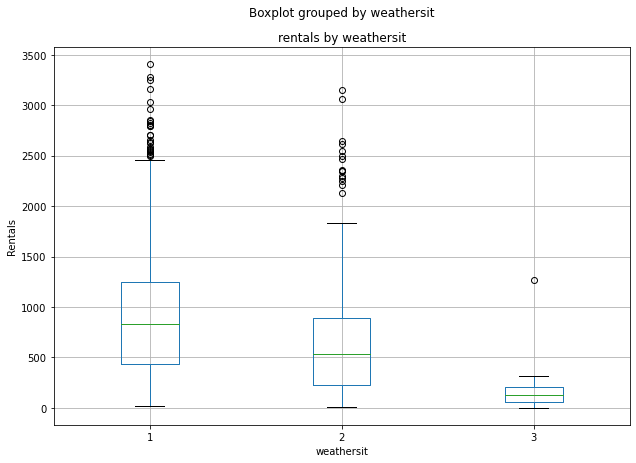

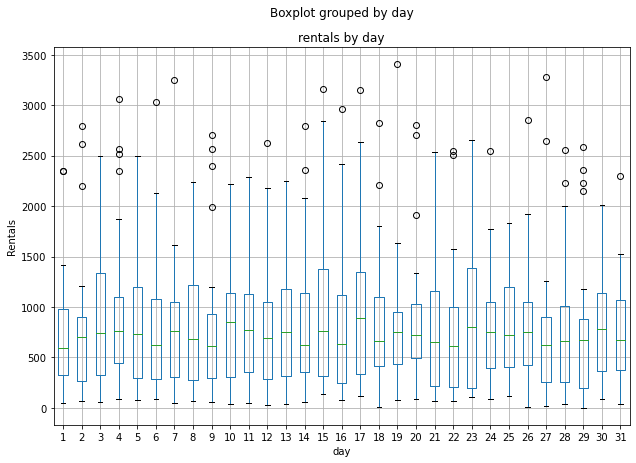

In [160]:
# plot a boxplot for label by each categorical feature
for col in categorical_features:
    bike_df.boxplot(column = 'rentals', by = col, figsize = (10,7))
    pllt.title('rentals ' + 'by ' + col)
    pllt.ylabel('Rentals')

In [161]:
#Train a regression model
#Sepearate features and label
X, y = bike_df[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_df['rentals'].values


In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 0)
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))


Training Set: 511 rows
Test Set: 220 rows


In [163]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)
print(model)

LinearRegression()


In [164]:
#Show 10 predictions vs actual values
predictions = model.predict(X_test)
for i in range(10):
    print('Predicted value:{} , Actual value: {}'.format(np.round(predictions[i]),y_test[i]))

Predicted value:1896.0 , Actual value: 2418
Predicted value:1184.0 , Actual value: 754
Predicted value:1007.0 , Actual value: 222
Predicted value:-28.0 , Actual value: 47
Predicted value:314.0 , Actual value: 244
Predicted value:385.0 , Actual value: 145
Predicted value:475.0 , Actual value: 240
Predicted value:590.0 , Actual value: 555
Predicted value:1476.0 , Actual value: 3252
Predicted value:-22.0 , Actual value: 38


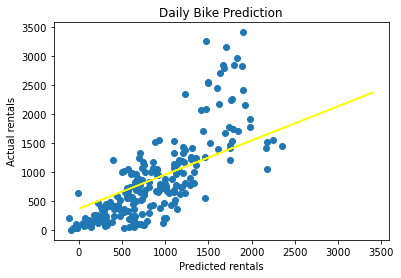

In [165]:
pllt.scatter(x = predictions, y = y_test)
pllt.xlabel('Predicted rentals')
pllt.ylabel('Actual rentals')
pllt.title('Daily Bike Prediction')
z = np.polyfit(y_test,predictions,1)
p = np.poly1d(z)
pllt.plot(y_test, p(y_test) , c = 'yellow')

In [166]:
#evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predictions)
print('Mean squared error:',mse)
r2 = r2_score(y_test, predictions)
print('R squared:',r2)

Mean squared error: 201972.559470356
R squared: 0.6040454736919189
